In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\association rules\\book (1).csv")

# performing initial analysis 


In [3]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
books.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [5]:
books.shape

(2000, 11)

In [6]:
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
books.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
books.describe(include='all')

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# understanding data in graph

<ipython-input-25-3426f2727b9d>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')


Text(0, 0.5, 'support')

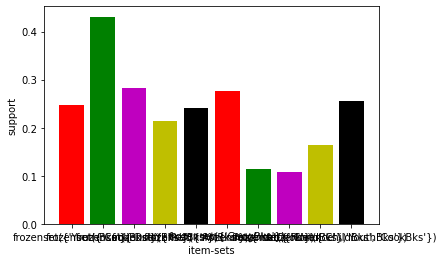

In [25]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(books,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')

In [26]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [27]:
def to_list(i):
    return (sorted(list(i)))

In [28]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [29]:
ma_X = ma_X.apply(sorted)

In [30]:
rules_sets = list(ma_X)

In [31]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [32]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [33]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [34]:

rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
258,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
234,"(DoItYBks, CookBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517
66,"(ChildBks, YouthBks)",(RefBks),0.1650,0.2145,0.0830,0.503030,2.345130,0.047608,1.580579
186,"(DoItYBks, YouthBks)",(RefBks),0.1155,0.2145,0.0580,0.502165,2.341093,0.033225,1.577830
108,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
34,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
114,"(DoItYBks, ChildBks)",(RefBks),0.1840,0.2145,0.0900,0.489130,2.280328,0.050532,1.537574
144,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
138,"(ChildBks, GeogBks)",(RefBks),0.1950,0.2145,0.0940,0.482051,2.247325,0.052172,1.516559
222,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797


In [35]:
movies=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\association rules\\my_movies.csv")

In [36]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [37]:
movies.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [38]:
movies.shape

(10, 15)

In [40]:
movies.describe(include='all')

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10,10,7,2,1,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
unique,4,5,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Gladiator,Patriot,Sixth Sense,Green Mile,LOTR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,6,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,NaN,NaN,NaN,NaN,NaN,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
movies.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [42]:
# since i am ignoring all categerical data

movies=movies.iloc[:,5:]

In [43]:
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [45]:
movies.count()

Sixth Sense      10
Gladiator        10
LOTR1            10
Harry Potter1    10
Patriot          10
LOTR2            10
Harry Potter2    10
LOTR             10
Braveheart       10
Green Mile       10
dtype: int64

In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [47]:
movies.shape

(10, 10)

<ipython-input-51-6806adf21338>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')


Text(0, 0.5, 'support')

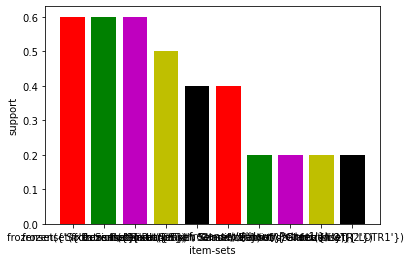

In [51]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(movies,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')


In [52]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [53]:
def to_list(i):
    return (sorted(list(i)))

In [54]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [55]:
ma_X = ma_X.apply(sorted)

In [56]:
rules_sets = list(ma_X)

In [57]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [58]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [59]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [60]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,"(Sixth Sense, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
114,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
54,"(Harry Potter1, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
60,"(Harry Potter1, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
16,"(Harry Potter1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
38,"(LOTR2, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
66,"(LOTR2, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
118,"(Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
